         COD_PROD_01  COD_PROD_02  COD_PROD_03  COD_PROD_04  COD_PROD_05  \
NUM_CLI                                                                    
10000            0.0          0.0       193.33          0.0         0.00   
10003            0.0          0.0         0.00          0.0      6971.16   
10004            0.0          0.0         0.00          0.0      4612.30   
10005            0.0          0.0         0.00          0.0      6589.00   
10006            0.0          0.0         0.00          0.0     13507.45   
...              ...          ...          ...          ...          ...   
92431            0.0          0.0         0.00          0.0    246823.96   
92611            0.0          0.0         0.00          0.0       573.24   
92621            0.0          0.0         0.00          0.0     33603.90   
92700            0.0          0.0      5374.44          0.0      5930.10   
94211            0.0          0.0       850.63          0.0       988.35   

         CO

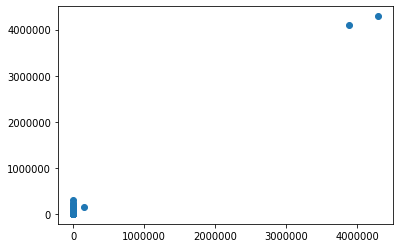

In [28]:
## SRV

#1. Importación de librerias a utilizar
import pandas as pd
import numpy as np
import csv
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#2. Obtener data de origen
df = pd.read_excel('C:\\Users\\Intel\\Documents\\Mis documentos IDEA\\Samples\Exportaciones.ILB\\Tabladinámica.xlsx', index_col=0)
print(df)
print(df.shape)
data_top=df.head()
df.head()

#3. Selección de columnas de trabajo
y_svr = df['TOTAL']
X_svr = df[['COD_PROD_06']]

#4. Grafica de los datos
plt.scatter(X_svr, y_svr)
plt.show()



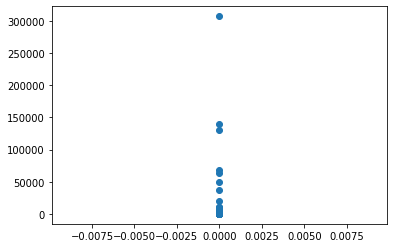

In [29]:
#5. Separación de datos de "train" en entrenamiento y prueba

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_svr, y_svr, test_size=0.2)

#6. Definición de parámetros en sintaxis
from sklearn.svm import SVR
svr = SVR(kernel='linear', C=1.0, epsilon=0.2)

#7. Entrenamiento del modelo
svr.fit(X_train, y_train)

#8. Ejecución de predicción
Y_pred = svr.predict(X_test)

#9. Grafico de datos con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='yellow', linewidth=3)
plt.show()


In [30]:
#10. Impresión de información resumen

print()
print('DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN')
print()
print('Precisión del modelo:')
print(svr.score(X_train, y_train))

print('Valor de la pendiente o coeficiente "a":')
print(svr.coef_)

print('Valor de la intersección o coeficiente "b":')
print(svr.intercept_)


DATOS DEL MODELO VECTORES DE SOPORTE REGRESIÓN

Precisión del modelo:
0.936058463108121
Valor de la pendiente o coeficiente "a":
[[0.78131079]]
Valor de la intersección o coeficiente "b":
[2674.94027207]


In [31]:
#11. Exportación a archivo csv
myData = [['COD_PROD_06_x','Constante'], [svr.coef_, svr.intercept_]]
myFile = open('C:\\Users\\Intel\\Documents\\Mis documentos IDEA\\Samples\Exportaciones.ILB\\Regresion_SVR01.csv', 'w')
with myFile:
   writer = csv.writer(myFile)
   writer.writerows(myData)

In [32]:
#12. Predicción a nivel de prueba
COD_PROD_06 = [100000]
print("Valor : \n", svr.predict([COD_PROD_06]))

Valor : 
 [80806.01906845]
